<a href="https://colab.research.google.com/github/asillymind22/AI/blob/main/RNNfashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import numpy as np

In [ ]:
(X_train,Y_train),(x_test,y_test)=fashion_mnist.load_data()
x=x_test

4431872/4422102 [==============================] - 0s 0us/step


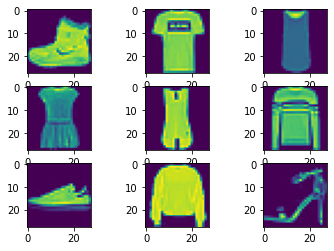

In [ ]:
for i in range (9):
  plt.subplot(330+i+1)
  plt.imshow(X_train[i])
plt.show()

In [ ]:
print("X_train shape",X_train.shape)
X_train=X_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
print("X_train shape",X_train.shape)
X_train=X_train.astype('float32')
x_test=x_test.astype('float32')

X_train/=255
x_test/=255

X_train shape (60000, 28, 28)
X_train shape (60000, 784)


In [ ]:
print("Y_train shape",Y_train.shape)
Y_train=to_categorical(Y_train,10)
y_test=to_categorical(y_test,10)
print(y_test.shape)

Y_train shape (60000,)
(10000, 10)


In [ ]:
model = Sequential()

model.add(Dense(1024, activation ='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation ='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.backend import categorical_crossentropy
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model.compile(loss=categorical_crossentropy, optimizer=RMSprop(), metrics=['accuracy'])

history= model.fit(X_train,Y_train,batch_size=128,epochs=30,verbose=1, validation_data=(x_test,y_test))

Epoch 1/30
469/469 [==============================] - 21s 41ms/step - loss: 0.5691 - accuracy: 0.7932 - val_loss: 0.4112 - val_accuracy: 0.8545
Epoch 2/30
469/469 [==============================] - 19s 41ms/step - loss: 0.4058 - accuracy: 0.8511 - val_loss: 0.4433 - val_accuracy: 0.8416
Epoch 3/30
469/469 [==============================] - 19s 41ms/step - loss: 0.3726 - accuracy: 0.8642 - val_loss: 0.3739 - val_accuracy: 0.8669
Epoch 4/30
469/469 [==============================] - 19s 41ms/step - loss: 0.3503 - accuracy: 0.8742 - val_loss: 0.3808 - val_accuracy: 0.8720
Epoch 5/30
469/469 [==============================] - 22s 46ms/step - loss: 0.3378 - accuracy: 0.8792 - val_loss: 0.3736 - val_accuracy: 0.8762
Epoch 6/30
469/469 [==============================] - 19s 40ms/step - loss: 0.3278 - accuracy: 0.8814 - val_loss: 0.3852 - val_accuracy: 0.8735
Epoch 7/30
469/469 [==============================] - 19s 40ms/step - loss: 0.3205 - accuracy: 0.8864 - val_loss: 0.3652 - val_accuracy:

In [ ]:
model.save('RNN_fashion.h5')
score = model.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 2s 7ms/step - loss: 0.4486 - accuracy: 0.8945


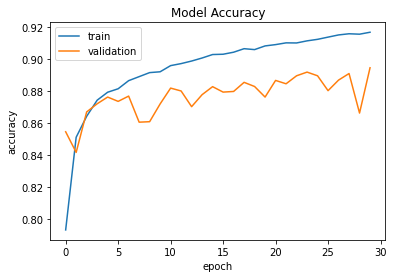

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

<function matplotlib.pyplot.show>

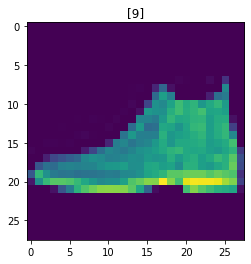

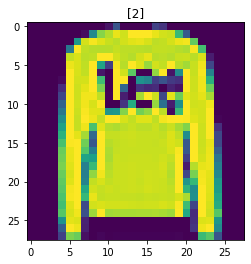

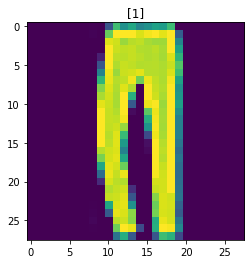

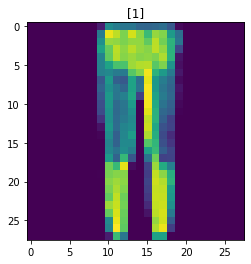

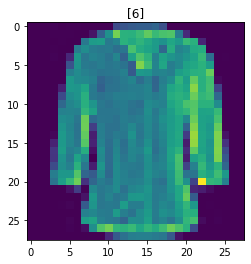

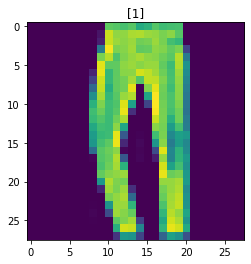

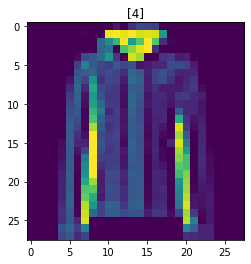

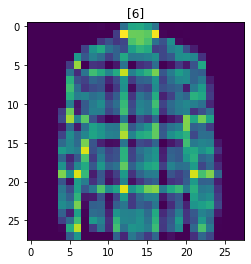

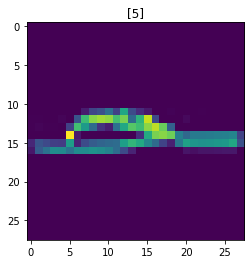

In [ ]:
pre_img=x.reshape(10000,784)
pre_img=pre_img.astype('float32')/255.0

y_pre = model.predict(pre_img)

for i in range (9):
  pre=y_pre[i]
  indices = np.where(pre == pre.max())[0]
  plt.figure(i)
  plt.title(str(indices))
  plt.imshow(x[i])
plt.show